In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, Markdown

In [2]:
df = pd.read_csv('./adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [4]:
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    display(Markdown(f'### {col} (уникальных: {df[col].nunique()})'))
    
    value_counts = df[col].value_counts(dropna=False)
    display(value_counts.to_frame(name='Количество'))

### workclass (уникальных: 9)

,Количество
workclass,
Private,33906
Self-emp-not-inc,3862
Local-gov,3136
?,2799
State-gov,1981
Self-emp-inc,1695
Federal-gov,1432
Without-pay,21
Never-worked,10


### education (уникальных: 16)

,Количество
education,
HS-grad,15784
Some-college,10878
Bachelors,8025
Masters,2657
Assoc-voc,2061
11th,1812
Assoc-acdm,1601
10th,1389
7th-8th,955


### marital-status (уникальных: 7)

,Количество
marital-status,
Married-civ-spouse,22379
Never-married,16117
Divorced,6633
Separated,1530
Widowed,1518
Married-spouse-absent,628
Married-AF-spouse,37


### occupation (уникальных: 15)

,Количество
occupation,
Prof-specialty,6172
Craft-repair,6112
Exec-managerial,6086
Adm-clerical,5611
Sales,5504
Other-service,4923
Machine-op-inspct,3022
?,2809
Transport-moving,2355


### relationship (уникальных: 6)

,Количество
relationship,
Husband,19716
Not-in-family,12583
Own-child,7581
Unmarried,5125
Wife,2331
Other-relative,1506


### race (уникальных: 5)

,Количество
race,
White,41762
Black,4685
Asian-Pac-Islander,1519
Amer-Indian-Eskimo,470
Other,406


### gender (уникальных: 2)

,Количество
gender,
Male,32650
Female,16192


### native-country (уникальных: 42)

,Количество
native-country,
United-States,43832
Mexico,951
?,857
Philippines,295
Germany,206
Puerto-Rico,184
Canada,182
El-Salvador,155
India,151


### income (уникальных: 2)

,Количество
income,
<=50K,37155
>50K,11687


# Пропуски
Видно, что пропусков нет. Есть '?', но в признаках, которые не будут использованы для обучения. Среди них workclass информативный сам по себе, но тк множества значений private то смысла использовать его нет.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


# Признаки
Выберем наиболее информативные признаки age, education (можно сразу брать educational-num, но преобразую сам для тренировки навыков), gender, hours-per-week. Построим графики, чтобы посмотреть влияют ли признаки на кровень дохода.

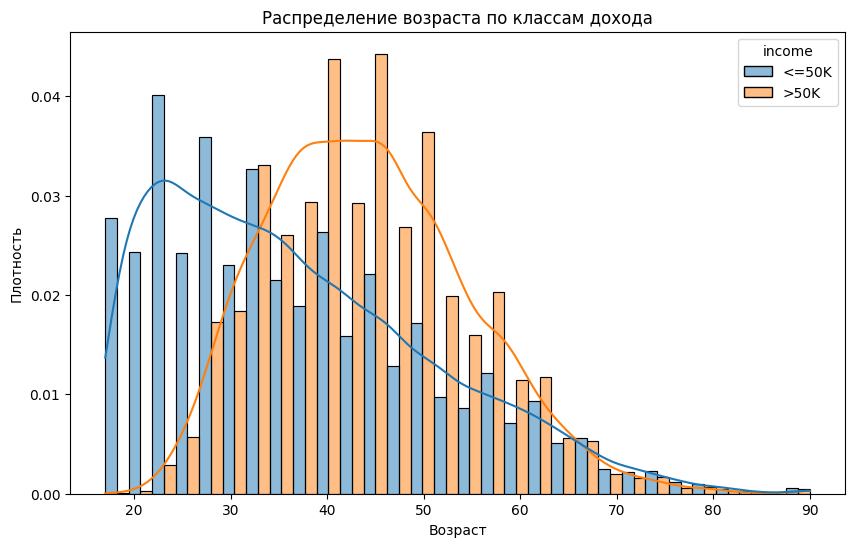

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='income', bins=30, kde=True, stat='density', common_norm=False, multiple='dodge')
plt.title('Распределение возраста по классам дохода')
plt.xlabel('Возраст')
plt.ylabel('Плотность')
plt.show()

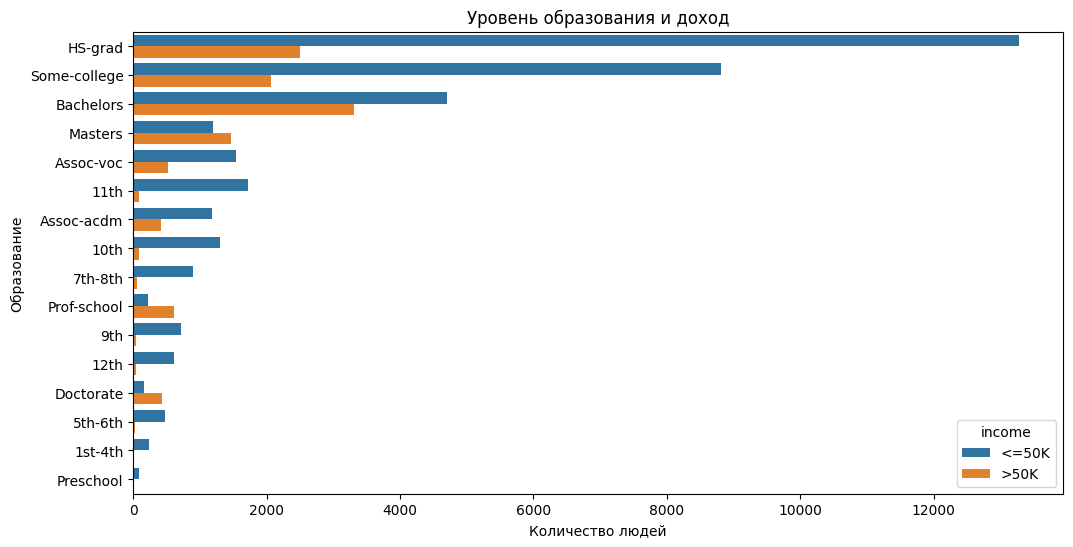

In [7]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='education', hue='income', order=df['education'].value_counts().index)
plt.title('Уровень образования и доход')
plt.xlabel('Количество людей')
plt.ylabel('Образование')
plt.show()

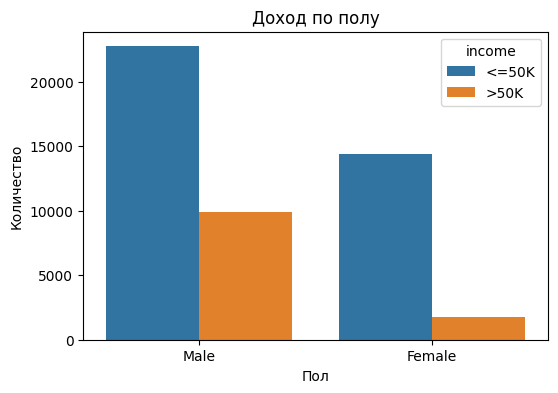

In [8]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='gender', hue='income')
plt.title('Доход по полу')
plt.xlabel('Пол')
plt.ylabel('Количество')
plt.show()

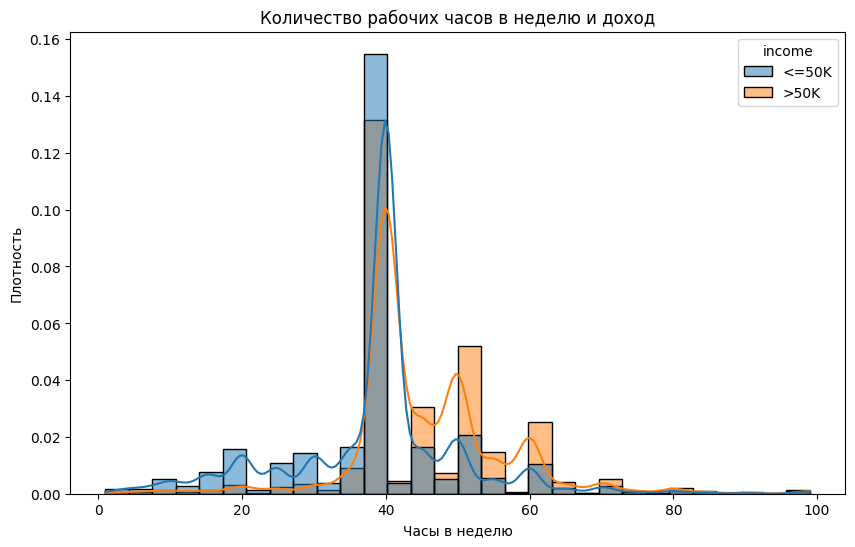

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='hours-per-week', hue='income', bins=30, kde=True, stat='density', common_norm=False, alpha=0.5)
plt.title('Количество рабочих часов в неделю и доход')
plt.xlabel('Часы в неделю')
plt.ylabel('Плотность')
plt.show()

In [10]:
df = df[['age', 'gender', 'education', 'hours-per-week', 'income']]
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})
df

,age,gender,education,hours-per-week,income
0,25,Male,11th,40,0
1,38,Male,HS-grad,50,0
2,28,Male,Assoc-acdm,40,1
3,44,Male,Some-college,40,1
4,18,Female,Some-college,30,0
...,...,...,...,...,...
48837,27,Female,Assoc-acdm,38,0
48838,40,Male,HS-grad,40,1
48839,58,Female,HS-grad,40,0
48840,22,Male,HS-grad,20,0


In [11]:
X = df.drop('income', axis=1)
y = df['income']

In [12]:
categorical_cols = X.select_dtypes(include='object').columns.tolist()
numerical_cols = X.select_dtypes(exclude='object').columns.tolist()

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X[numerical_cols])

In [14]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
X_cat_encoded = encoder.fit_transform(X[categorical_cols])

ohe_feature_names = encoder.get_feature_names_out(categorical_cols)

In [15]:
X_final = pd.DataFrame(
    np.hstack([X_num_scaled, X_cat_encoded]),
    columns=numerical_cols + list(ohe_feature_names),
    index=X.index
)
X_final

,age,hours-per-week,gender_Male,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college
0,-0.995129,-0.034087,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.046942,0.772930,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,-0.776316,-0.034087,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.390683,-0.034087,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-1.505691,-0.841104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,-0.849254,-0.195490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48838,0.098933,-0.034087,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
48839,1.411808,-0.034087,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
48840,-1.213941,-1.648120,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_final, y, test_size=0.2, random_state=42
)

In [17]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(max_iter=1000, random_state=42)
model_lr.fit(X_train, y_train)
model_lr.score(X_test, y_test)

0.8019244549083837

In [18]:
from sklearn.svm import SVC

model_svm = SVC(kernel='linear')
model_svm.fit(X_train, y_train)
model_svm.score(X_test, y_test)

0.7844201044119152

# Результаты
## Преобразования
- Целевая переменная `income` была закодирована как бинарная: `0` для `<=50K` и `1` для `>50K`.
- Категориальные признаки преобразованы с помощью One-Hot Encoding (`drop='first'`, `handle_unknown='ignore'`).
- Числовые признаки (`age`, `hours-per-week`, и др.) были стандартизированы с помощью `StandardScaler`.
- Все преобразованные признаки объединены в итоговый числовой DataFrame.
- Данные были разделены на обучающую и тестовую выборки (80/20).
## Сравнение
- LogisticRegression справилась лучше судя по accuracy, а также значительно быстрее.
## Выводы
- Обе модели показали разумную точность и справились с задачей бинарной классификации.
## Улучшения
- Провести более подробный отбор признаков и/или создать дополнительные признаки
- Применить `GridSearchCV` для подбора гиперпараметров.
- Использовать более сложные модели: Random Forest, XGBoost, CatBoost и т.п.
- Учесть дисбаланс классов, если он есть, с помощью `class_weight='balanced'`.
